In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
def accuracy(x,y):
    acc = 0
    for i in range(len(x)):
        if x[i,]==y[i,]:
            acc+=1
        else:
            acc+=0
    rate = acc/len(x)
    print('Accuracy rate is: ',rate)
    
    
def plot(image,ans):
    if len(image) > 10 | len(ans) > 10:
        print('TOO MANY PHOTOS IN ONE TIME!!')
        print('The maximum is 10 photos')
    for i in range(len(image)):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i,...])
        plt.title(ans[i])

In [2]:
path=os.getcwd()+'\\DATA\\picture02'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)

Images are all in read_images
(40000, 100, 100)


In [3]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


# batch size=32   epoch=100

In [5]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_p2_32 = Sequential()
model_inv3_p2_32.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_p2_32.add(Flatten())
model_inv3_p2_32.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\model_iter_p2_32.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_p2_32.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_inv3_p2_32 = model_inv3_p2_32.fit(x=x_train, y=y_train, validation_split=0.3, epochs=100, batch_size=32, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 22400 samples, validate on 9600 samples
Epoch 1/100

Epoch 00001: acc improved from -inf to 0.35563, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 63s - loss: 1.6769 - acc: 0.3556 - val_loss: 108.8123 - val_acc: 0.2051
Epoch 2/100

Epoch 00002: acc improved from 0.35563 to 0.42924, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 1.4654 - acc: 0.4292 - val_loss: 3.7491 - val_acc: 0.2327
Epoch 3/100

Epoch 00003: acc did not improve from 0.42924
22400/22400 - 52s - loss: 1.7262 - acc: 0.3668 - val_loss: 1.5782 - val_acc: 0.3689
Epoch 4/100

Epoch 00004: acc did not improve from 0.42924
22400/22400 - 52s - loss: 1.4286 - acc: 0.4267 - val_loss: 6.7897 - val_acc: 0.2673
Epoch 5/100

Epoch 00005: acc improved from 0.42924 to 0.46156, saving model to C:\Use

22400/22400 - 52s - loss: 0.2623 - acc: 0.8527 - val_loss: 0.4729 - val_acc: 0.7953
Epoch 38/100

Epoch 00038: acc improved from 0.85272 to 0.85594, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 0.2424 - acc: 0.8559 - val_loss: 0.5755 - val_acc: 0.7644
Epoch 39/100

Epoch 00039: acc improved from 0.85594 to 0.85790, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 0.2371 - acc: 0.8579 - val_loss: 0.3855 - val_acc: 0.8178
Epoch 40/100

Epoch 00040: acc improved from 0.85790 to 0.85978, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 0.2337 - acc: 0.8598 - val_loss: 0.3454 - val_acc: 0.8226
Epoch 41/100

Epoch 00041: acc improved from 0.85978 to 0.86196, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 0.2367 - acc: 0.8620 - val_loss: 0.5931 - val_

Epoch 75/100

Epoch 00075: acc improved from 0.98442 to 0.98531, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 0.0432 - acc: 0.9853 - val_loss: 0.6607 - val_acc: 0.8276
Epoch 76/100

Epoch 00076: acc improved from 0.98531 to 0.98763, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 0.0368 - acc: 0.9876 - val_loss: 0.7479 - val_acc: 0.8247
Epoch 77/100

Epoch 00077: acc improved from 0.98763 to 0.98790, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_32.hdf5
22400/22400 - 52s - loss: 0.0345 - acc: 0.9879 - val_loss: 0.8351 - val_acc: 0.8091
Epoch 78/100

Epoch 00078: acc did not improve from 0.98790
22400/22400 - 52s - loss: 0.0402 - acc: 0.9862 - val_loss: 0.7639 - val_acc: 0.8138
Epoch 79/100

Epoch 00079: acc did not improve from 0.98790
22400/22400 - 52s - loss: 0.0453 - acc: 0.9843 - val_loss: 0.7414 - val_acc: 0.8128
Epoch 80/100

Ep

TypeError: can't pickle _thread.RLock objects

In [10]:
with open(file=r'C:\Users\user\Desktop\project\incv3_p2_batch\train_history_inv3_p2_32.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_inv3_p2_32.history,outhis)  

# batch size=64 epoch=100

In [11]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_p2_64 = Sequential()
model_inv3_p2_64.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_p2_64.add(Flatten())
model_inv3_p2_64.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\model_iter_p2_64.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_p2_64.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_inv3_p2_64 = model_inv3_p2_64.fit(x=x_train, y=y_train, validation_split=0.3, epochs=100, batch_size=64, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\incv3_p2_batch\train_history_inv3_p2_64.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_inv3_p2_64.history, outhis)

Train on 22400 samples, validate on 9600 samples
Epoch 1/100

Epoch 00001: acc improved from -inf to 0.40920, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 48s - loss: 1.4755 - acc: 0.4092 - val_loss: 1.5238 - val_acc: 0.4111
Epoch 2/100

Epoch 00002: acc improved from 0.40920 to 0.48112, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 1.2314 - acc: 0.4811 - val_loss: 42.1209 - val_acc: 0.2967
Epoch 3/100

Epoch 00003: acc improved from 0.48112 to 0.51125, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 1.1967 - acc: 0.5113 - val_loss: 1.2411 - val_acc: 0.4976
Epoch 4/100

Epoch 00004: acc improved from 0.51125 to 0.56728, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 1.0524 - acc: 0.5673 - val_loss: 1.5512 - val_acc: 0.4557
Epoch 5/100

Epoch 00005: acc


Epoch 00041: acc did not improve from 0.86844
22400/22400 - 38s - loss: 0.2384 - acc: 0.8636 - val_loss: 0.4289 - val_acc: 0.8118
Epoch 42/100

Epoch 00042: acc improved from 0.86844 to 0.87187, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 0.2195 - acc: 0.8719 - val_loss: 0.7163 - val_acc: 0.7459
Epoch 43/100

Epoch 00043: acc improved from 0.87187 to 0.87478, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 0.2210 - acc: 0.8748 - val_loss: 0.6027 - val_acc: 0.7900
Epoch 44/100

Epoch 00044: acc improved from 0.87478 to 0.87759, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 0.2235 - acc: 0.8776 - val_loss: 0.3873 - val_acc: 0.8166
Epoch 45/100

Epoch 00045: acc improved from 0.87759 to 0.88563, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss:

22400/22400 - 38s - loss: 0.0238 - acc: 0.9921 - val_loss: 0.8015 - val_acc: 0.8295
Epoch 82/100

Epoch 00082: acc did not improve from 0.99205
22400/22400 - 38s - loss: 0.0284 - acc: 0.9908 - val_loss: 0.8961 - val_acc: 0.8151
Epoch 83/100

Epoch 00083: acc improved from 0.99205 to 0.99250, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 0.0207 - acc: 0.9925 - val_loss: 1.2287 - val_acc: 0.7942
Epoch 84/100

Epoch 00084: acc did not improve from 0.99250
22400/22400 - 38s - loss: 0.0330 - acc: 0.9897 - val_loss: 1.0038 - val_acc: 0.7897
Epoch 85/100

Epoch 00085: acc did not improve from 0.99250
22400/22400 - 38s - loss: 0.0261 - acc: 0.9910 - val_loss: 0.8426 - val_acc: 0.8220
Epoch 86/100

Epoch 00086: acc improved from 0.99250 to 0.99317, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_64.hdf5
22400/22400 - 38s - loss: 0.0206 - acc: 0.9932 - val_loss: 0.8799 - val_acc: 0.8155
Epoch 87/100

Epoch 

# batch size=128 epoch=100

In [12]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_p2_128 = Sequential()
model_inv3_p2_128.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_p2_128.add(Flatten())
model_inv3_p2_128.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\model_iter_p2_128.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_p2_128.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_inv3_p2_128 = model_inv3_p2_128.fit(x=x_train, y=y_train, validation_split=0.3, epochs=100, batch_size=128, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\incv3_p2_batch\train_history_inv3_p2_128.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_inv3_p2_128.history, outhis)

Train on 22400 samples, validate on 9600 samples
Epoch 1/100

Epoch 00001: acc improved from -inf to 0.37888, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 44s - loss: 1.5447 - acc: 0.3789 - val_loss: 2.5810 - val_acc: 0.1473
Epoch 2/100

Epoch 00002: acc improved from 0.37888 to 0.50286, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 31s - loss: 1.1822 - acc: 0.5029 - val_loss: 2.1329 - val_acc: 0.3073
Epoch 3/100

Epoch 00003: acc improved from 0.50286 to 0.56589, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 31s - loss: 1.0461 - acc: 0.5659 - val_loss: 1.1107 - val_acc: 0.5570
Epoch 4/100

Epoch 00004: acc improved from 0.56589 to 0.61540, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 31s - loss: 0.9138 - acc: 0.6154 - val_loss: 1.7258 - val_acc: 0.5901
Epoch 5/100

Epoch 00005: 

Epoch 39/100

Epoch 00039: acc improved from 0.92107 to 0.92946, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 32s - loss: 0.1662 - acc: 0.9295 - val_loss: 0.8725 - val_acc: 0.7404
Epoch 40/100

Epoch 00040: acc improved from 0.92946 to 0.94147, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 32s - loss: 0.1392 - acc: 0.9415 - val_loss: 0.6854 - val_acc: 0.7844
Epoch 41/100

Epoch 00041: acc improved from 0.94147 to 0.94625, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 32s - loss: 0.1371 - acc: 0.9463 - val_loss: 1235.6714 - val_acc: 0.1309
Epoch 42/100

Epoch 00042: acc did not improve from 0.94625
22400/22400 - 31s - loss: 0.4565 - acc: 0.8326 - val_loss: 0.6195 - val_acc: 0.7554
Epoch 43/100

Epoch 00043: acc did not improve from 0.94625
22400/22400 - 31s - loss: 0.2082 - acc: 0.9117 - val_loss: 0.6522 - val_acc: 0.7625
Epoch 44/1

Epoch 87/100

Epoch 00087: acc did not improve from 0.99353
22400/22400 - 31s - loss: 0.0293 - acc: 0.9906 - val_loss: 0.9333 - val_acc: 0.8073
Epoch 88/100

Epoch 00088: acc did not improve from 0.99353
22400/22400 - 31s - loss: 0.0232 - acc: 0.9930 - val_loss: 1.2059 - val_acc: 0.7466
Epoch 89/100

Epoch 00089: acc improved from 0.99353 to 0.99406, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_128.hdf5
22400/22400 - 32s - loss: 0.0169 - acc: 0.9941 - val_loss: 1.2059 - val_acc: 0.7582
Epoch 90/100

Epoch 00090: acc did not improve from 0.99406
22400/22400 - 31s - loss: 0.0191 - acc: 0.9937 - val_loss: 1.6271 - val_acc: 0.7135
Epoch 91/100

Epoch 00091: acc did not improve from 0.99406
22400/22400 - 31s - loss: 0.0286 - acc: 0.9906 - val_loss: 1.3638 - val_acc: 0.7705
Epoch 92/100

Epoch 00092: acc did not improve from 0.99406
22400/22400 - 31s - loss: 0.1017 - acc: 0.9694 - val_loss: 0.8322 - val_acc: 0.7868
Epoch 93/100

Epoch 00093: acc did not improve 

# batch size=256 epoch=100¶

In [13]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_p2_256 = Sequential()
model_inv3_p2_256.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_p2_256.add(Flatten())
model_inv3_p2_256.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\model_iter_p2_256.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_p2_256.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_inv3_p2_256 = model_inv3_p2_256.fit(x=x_train, y=y_train, validation_split=0.3, epochs=100, batch_size=256, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\incv3_p2_batch\train_history_inv3_p2_256.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_inv3_p2_256.history, outhis)

Train on 22400 samples, validate on 9600 samples
Epoch 1/100

Epoch 00001: acc improved from -inf to 0.36634, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_256.hdf5
22400/22400 - 45s - loss: 1.5909 - acc: 0.3663 - val_loss: 2.3847 - val_acc: 0.1323
Epoch 2/100

Epoch 00002: acc improved from 0.36634 to 0.47888, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_256.hdf5
22400/22400 - 29s - loss: 1.2628 - acc: 0.4789 - val_loss: 3.1179 - val_acc: 0.1342
Epoch 3/100

Epoch 00003: acc improved from 0.47888 to 0.53754, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_256.hdf5
22400/22400 - 29s - loss: 1.0984 - acc: 0.5375 - val_loss: 3.5611 - val_acc: 0.1914
Epoch 4/100

Epoch 00004: acc improved from 0.53754 to 0.58942, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_256.hdf5
22400/22400 - 29s - loss: 0.9809 - acc: 0.5894 - val_loss: 4.0172 - val_acc: 0.2046
Epoch 5/100

Epoch 00005: 

Epoch 38/100

Epoch 00038: acc improved from 0.97156 to 0.97576, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_256.hdf5
22400/22400 - 29s - loss: 0.0691 - acc: 0.9758 - val_loss: 1.7429 - val_acc: 0.6814
Epoch 39/100

Epoch 00039: acc improved from 0.97576 to 0.98027, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_256.hdf5
22400/22400 - 29s - loss: 0.0548 - acc: 0.9803 - val_loss: 1.2665 - val_acc: 0.7400
Epoch 40/100

Epoch 00040: acc did not improve from 0.98027
22400/22400 - 28s - loss: 0.0671 - acc: 0.9764 - val_loss: 1.6184 - val_acc: 0.7144
Epoch 41/100

Epoch 00041: acc did not improve from 0.98027
22400/22400 - 28s - loss: 0.0705 - acc: 0.9742 - val_loss: 1.0426 - val_acc: 0.7601
Epoch 42/100

Epoch 00042: acc improved from 0.98027 to 0.98161, saving model to C:\Users\user\Desktop\project\incv3_p2_batch\model_iter_p2_256.hdf5
22400/22400 - 29s - loss: 0.0545 - acc: 0.9816 - val_loss: 0.9998 - val_acc: 0.7719
Epoch 43/100


Epoch 87/100

Epoch 00087: acc did not improve from 0.99536
22400/22400 - 28s - loss: 0.0364 - acc: 0.9880 - val_loss: 1.0229 - val_acc: 0.7920
Epoch 88/100

Epoch 00088: acc did not improve from 0.99536
22400/22400 - 28s - loss: 0.0192 - acc: 0.9931 - val_loss: 2.0996 - val_acc: 0.6805
Epoch 89/100

Epoch 00089: acc did not improve from 0.99536
22400/22400 - 28s - loss: 0.0244 - acc: 0.9916 - val_loss: 1.2097 - val_acc: 0.7597
Epoch 90/100

Epoch 00090: acc did not improve from 0.99536
22400/22400 - 28s - loss: 0.0253 - acc: 0.9912 - val_loss: 1.6983 - val_acc: 0.7181
Epoch 91/100

Epoch 00091: acc did not improve from 0.99536
22400/22400 - 28s - loss: 0.0266 - acc: 0.9911 - val_loss: 1.2836 - val_acc: 0.7675
Epoch 92/100

Epoch 00092: acc did not improve from 0.99536
22400/22400 - 28s - loss: 0.0212 - acc: 0.9929 - val_loss: 1.9376 - val_acc: 0.7404
Epoch 93/100

Epoch 00093: acc did not improve from 0.99536
22400/22400 - 28s - loss: 0.0265 - acc: 0.9900 - val_loss: 1.4338 - val_acc:

In [5]:
dirpath=r'C:\Users\user\Desktop\project\incv3_p2_batch\history\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename

['C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\history\\train_history_inv3_p2_128.lst',
 'C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\history\\train_history_inv3_p2_256.lst',
 'C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\history\\train_history_inv3_p2_32.lst',
 'C:\\Users\\user\\Desktop\\project\\incv3_p2_batch\\history\\train_history_inv3_p2_64.lst']

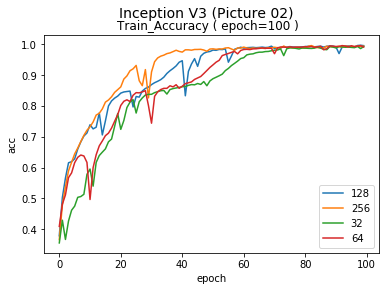

In [6]:
import glob
import pickle
import matplotlib.pyplot as plt

# train acc

label=(128,256,32,64)

for i in range(0,4):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['acc'],label=label[i])
        
    plt.xlabel('epoch') 
    plt.ylabel('acc')
    
    plt.suptitle('Inception V3 (Picture 02)',fontsize=14)    # 當有使用 plt.subplot， 總 title
    plt.title('Train_Accuracy ( epoch=100 )  ') #要改
    
    plt.legend(loc=4)
    
    
plt.savefig(r'C:\Users\user\Desktop\project\incv3_p2_batch\history\train_acc_p2_batchsize.jpg')    #匯出到資料夾 
plt.show()

In [8]:
dirpath1=r'C:\Users\user\Desktop\project\incv3_p2_batch\*.*' 
filename2=glob.glob(dirpath1)
filename2
test_acc=[]
test_loss=[]

for i in range(0,4):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
  



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
8000/8000 [==============================] - 5s 666us/sample - loss: 0.9009 - acc: 0.8176
